# Figure S04: Regression of heritability estimates for the 195 strains

in the GWAS mapping panel against the eight strains from Widmayer et al. 2022

In [ ]:

library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
# Source the output functions
source("bin/outs.R")



Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'flextable'

The following objects are masked from 'package:kableExtra':

    as_image, footnote

The following objects are masked from 'package:ggpubr':

    border, font, rotate

The following object is masked from 'package:purrr':

    compose

here() starts at /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript

$strain_table
$strain_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.html"

$strain_table$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.tsv.zip"

$strain_table$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.docx"

$strain_table$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.csv"


$tox_table_ft
$tox_table_ft$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.html"

$tox_table_ft$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.tsv.zip"

$tox_table_ft$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.docx"

$tox_table_ft$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.csv"


$trait_table
$trait_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S3/table_S3.html"

$trait_table$tsv
[1] "

# Read in data

In [ ]:
# read in the heritabilities from Widmayer 2022 and our h2s
h_comp <- data.table::fread("data/raw/heritability/20240719_heritability_comparision_GWAS.csv")


# H2: Broad-sense heritability estimates

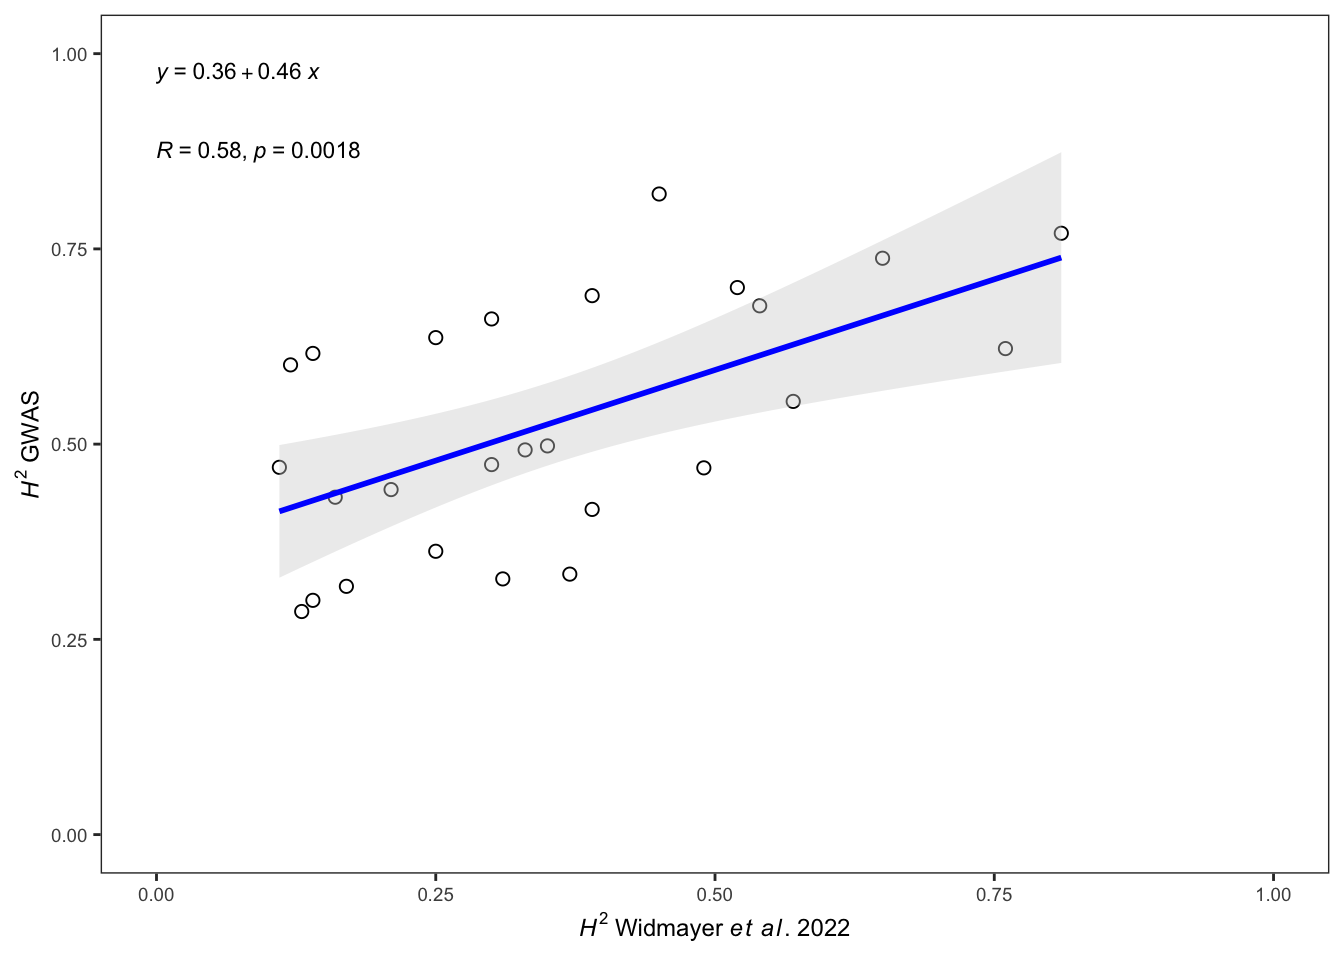

In [ ]:
# plot the comps
H_comp2 <-
  ggpubr::ggscatter(h_comp,
    x = "H2_widmayer", y = "H2_GWAS",
    color = "black", shape = 21, size = 2, # Points color, shape and size
    add = "reg.line", # Add regression line
    add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
    conf.int = TRUE, # Add confidence interval
    cor.coef = TRUE, # Add correlation coefficient. see ?stat_cor
    cor.coef.size = 3,
    cor.coeff.args = list(method = "pearson", label.x = 0.0, label.y = 0.875)
  ) +
  ggpubr::stat_regline_equation(label.x = 0, size = 3) +
  ggplot2::theme_bw() +
  xlim(0, 1) +
  ylim(0, 1) +
  labs(
    x = expression(paste(italic(H)^{
      2
    }, " Widmayer ", italic(et), " ", italic(al), ". ", "2022")),
    y = expression(paste(italic(H)^{
      2
    }, " GWAS"))
  ) +
  theme(
    axis.text = element_text(size = 7),
    axis.title = element_text(size = 9),
    panel.grid = element_blank()
  )

H_comp2


# h2: Narrow-sense heritability estiamtes

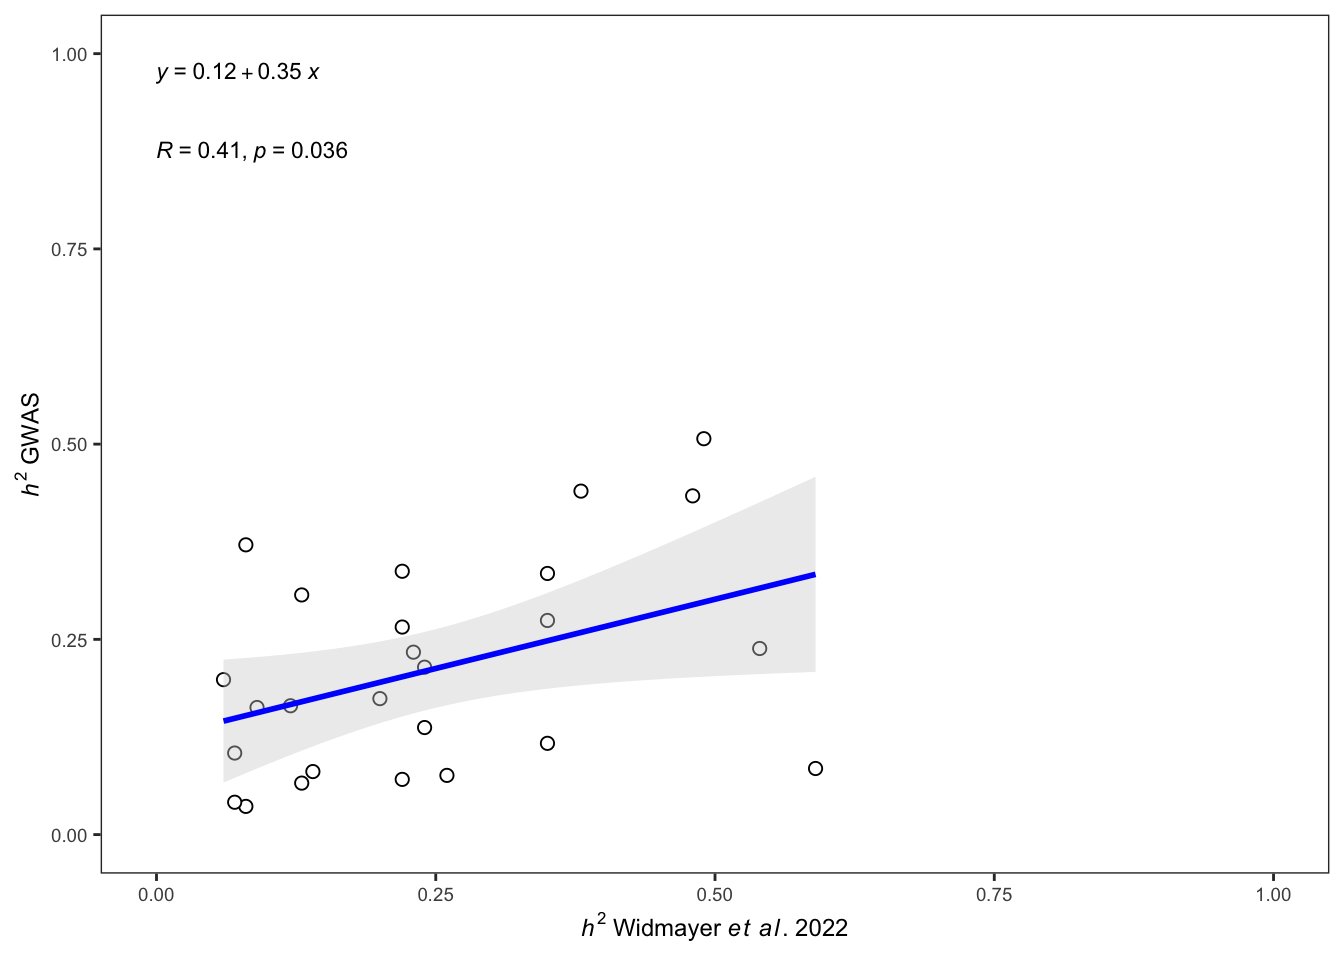

In [ ]:
# plot narrow sense comp now
h_comp3 <-
  ggpubr::ggscatter(h_comp,
    x = "h2_widmayer", y = "h2_GWAS",
    color = "black", shape = 21, size = 2, # Points color, shape and size
    add = "reg.line", # Add regression line
    add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
    conf.int = TRUE, # Add confidence interval
    cor.coef = TRUE, # Add correlation coefficient. see ?stat_cor
    cor.coef.size = 3,
    cor.coeff.args = list(method = "pearson", label.x = 0.0, label.y = 0.875)
  ) +
  ggpubr::stat_regline_equation(label.x = 0, size = 3) +
  ggplot2::theme_bw() +
  xlim(0, 1) +
  ylim(0, 1) +
  labs(
    x = expression(paste(italic(h)^{
      2
    }, " Widmayer ", italic(et), " ", italic(al), ". ", "2022")),
    y = expression(paste(italic(h)^{
      2
    }, " GWAS"))
  ) +
  theme(
    axis.text = element_text(size = 7),
    axis.title = element_text(size = 9),
    panel.grid = element_blank()
  )

h_comp3


# Combined plots

In [ ]:
# put them together
h_comp_supplement <- cowplot::plot_grid(H_comp2, h_comp3, labels = c("A", "B"), align = "hv")

save_plot(
  h_comp_supplement,
  sup_figure_fns$heritability_comp,
  w_in = 7.5, h_in = 3
)


Warning in grid.Call.graphics(C_polygon, x$x, x$y, index): semi-transparency is
not supported on this device: reported only once per page

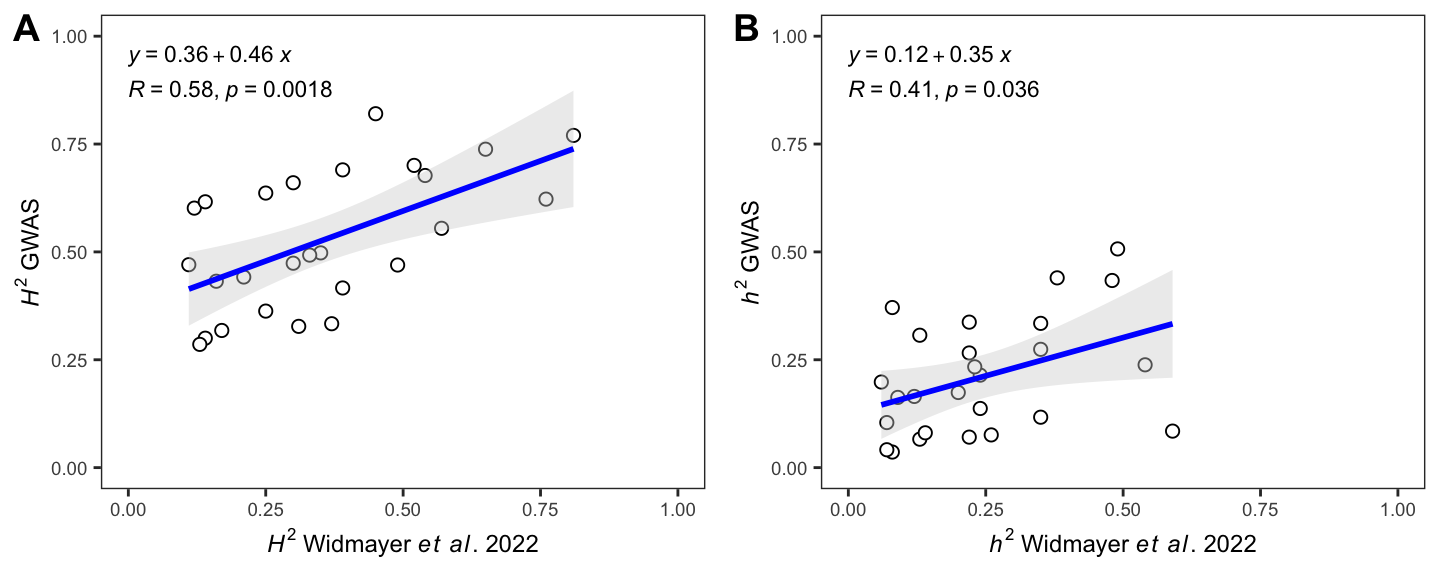

In [ ]:
h_comp_supplement


# Double check linear model outputs outside of ggpubr function

## H2

In [ ]:
# check the linear model outputs outside of ggpubr functions for safety
H_m1 <- lm(data = h_comp, formula = H2_GWAS ~ H2_widmayer)
summary(H_m1)



Call:
lm(formula = H2_GWAS ~ H2_widmayer, data = h_comp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20106 -0.11954 -0.02097  0.09055  0.24855 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.36281    0.05329   6.808 4.84e-07 ***
H2_widmayer  0.46428    0.13196   3.518  0.00176 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1305 on 24 degrees of freedom
Multiple R-squared:  0.3403,    Adjusted R-squared:  0.3128 
F-statistic: 12.38 on 1 and 24 DF,  p-value: 0.001761

## h2

In [ ]:
h_m2 <- lm(data = h_comp, formula = h2_GWAS ~ h2_widmayer)
summary(h_m2)



Call:
lm(formula = h2_GWAS ~ h2_widmayer, data = h_comp)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.248638 -0.101418  0.001779  0.080586  0.218611 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.12406    0.04594   2.701   0.0125 *
h2_widmayer  0.35462    0.15993   2.217   0.0363 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1243 on 24 degrees of freedom
Multiple R-squared:   0.17, Adjusted R-squared:  0.1355 
F-statistic: 4.917 on 1 and 24 DF,  p-value: 0.03632

# Get means and SDs of the heritabilities

## H2

In [ ]:
# get a mean and SD for all H2s
H2_mean <- mean(h_comp$H2_GWAS)
H2_sd <- sd(h_comp$H2_GWAS)

print(glue::glue("Mean H2: {round(H2_mean, 3)} +/- {round(H2_sd, 3)}"))


Mean H2: 0.527 +/- 0.157

## h2

In [ ]:
h2_mean <- mean(h_comp$h2_GWAS)
h2_sd <- sd(h_comp$h2_GWAS)

print(glue::glue("Mean h2: {round(h2_mean, 3)} +/- {round(h2_sd, 3)}"))


Mean h2: 0.21 +/- 0.134